# Messi Detection -- Computer Vision Model
## A TensorFlow approach on a basic convolutional neural network
### By: Juan Diego Vivas Fonseca

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import os
import cv2
import random

## Import Data:

#### Inputs:

In [2]:
dire='E:/Documentos/Pruebas Python/Messi Convnet/Data'
direval='E:/Documentos/Pruebas Python/Messi Convnet/Validation Data'
categories=['Normal People', 'Messi'] #This means Messi gonna be one, normal people zero.
validation=['Validation']
img_size=250

#### Code to read all photos in a specific file, then turns them into an array:

In [3]:
training = []
new_array = []


def create_training_data():
    for i in categories: 
        path = os.path.join(dire,i)  
        cate = categories.index(i)  

        for img in os.listdir(path): 
            img_array = cv2.imread(os.path.join(path,img)) #,cv2.IMREAD_GRAYSCALE) 
            global new_array
            new_array = cv2.resize(img_array, (img_size, img_size))  
            training.append([new_array, cate]) 

create_training_data()

print(len(training))

233


#### Lets see a random pic:

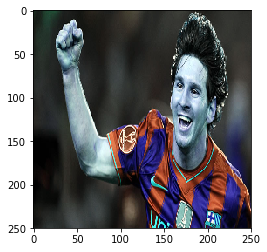

In [4]:
plt.imshow(new_array, cmap='gray')
plt.show()

#### (Optional) Code to directly read the images with TensorFlow:

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        dire, 
        target_size=(img_size, img_size),
        batch_size=128,
        class_mode='binary')

## Build a target and feature array:

In [5]:
## Mix up the sample to improve learning
random.shuffle(training)

x=[]
y=[]

for features, target in training:
    x.append(features)
    y.append(target)

x = np.array(x).reshape(-1, img_size, img_size, 3) #This is because we cant pass a list as a feature container
y = np.array(y)

#### Rescale the data (Neural Nets usually work better with features between 0 and 1)

In [6]:
x=x/255 #255 is the maximum value

## Model Definition:

#### Define a callback function (Optional):

In [7]:
desired_accuracy= 0.98

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
          if(logs.get('accuracy')>desired_accuracy):
            print("\nReached 98% accuracy, training stopped.")
            self.model.stop_training = True

callbacks = myCallback()

### Convolutional Neural Network:

Note: Kinda big neural network due to the complexity of the task. In other circumstances the number of parameters could be easily reduced by extra convolutions or less neurons.

In [8]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)), # Note the input shape is the desired size of the image with 3 bytes color
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid') # Output Neuron. Binary Choice (1 for Messi, 0 for Normal People)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 238144)            0         
_________________________________________________________________
dense (Dense)                (None, 120)               28577400  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3

### Compiling options:

For example, RMSprop optimizer let us control the learning rate:

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

On the other hand, optimizers such as ADAM automatically adapt the learning rate during training (Here I used this one).

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Training:

Training with 20 epochs (could be stopped by our callback function), batch size set to 64 for performance, no validation test in training due the small size of the data.

In [10]:
model.fit(x , y ,
          validation_split=0,
          steps_per_epoch=None,  
          epochs=20,
          verbose=1,
          batch_size=64,
          callbacks=[callbacks])

Epoch 1/20
4/4 [==============================] - 4s 1s/step - loss: 1.8417 - accuracy: 0.5837
Epoch 2/20
4/4 [==============================] - 4s 1s/step - loss: 1.2736 - accuracy: 0.4592
Epoch 3/20
4/4 [==============================] - 4s 1s/step - loss: 0.6694 - accuracy: 0.6052
Epoch 4/20
4/4 [==============================] - 4s 1s/step - loss: 0.6449 - accuracy: 0.7296
Epoch 5/20
4/4 [==============================] - 4s 1s/step - loss: 0.5644 - accuracy: 0.7425
Epoch 6/20
4/4 [==============================] - 4s 1s/step - loss: 0.4881 - accuracy: 0.7768
Epoch 7/20
4/4 [==============================] - 4s 1s/step - loss: 0.4136 - accuracy: 0.8197
Epoch 8/20
4/4 [==============================] - 5s 1s/step - loss: 0.2968 - accuracy: 0.8884
Epoch 9/20
4/4 [==============================] - 4s 1s/step - loss: 0.1758 - accuracy: 0.9356
Epoch 10/20
4/4 [==============================] - 4s 1s/step - loss: 0.0915 - accuracy: 0.9785
Epoch 11/20
4/4 [==============================] 

Same training but with the TensorFlow flow_from_directory data:

In [ ]:
model.fit(train_generator ,
          steps_per_epoch=None,  
          epochs=10,
          verbose=1,
          batch_size=64,
          callbacks=[callbacks])

## Testing with new data:

Import and preprocessing of the new images:

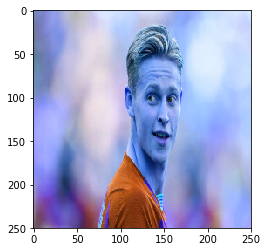

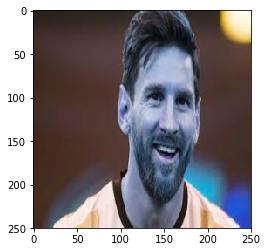

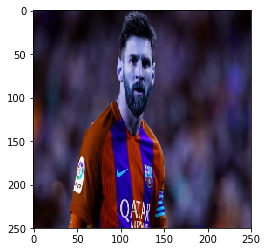

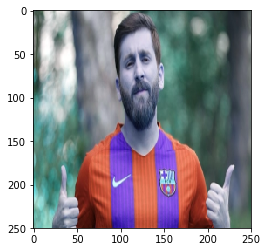

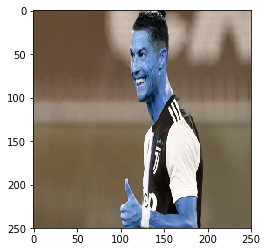

In [11]:
val_array= []
validate= []

def create_validation_data():
    for i in validation: 
        path = os.path.join(direval,i)   

        for img in os.listdir(path): 
            img_array = cv2.imread(os.path.join(path,img)) #,cv2.IMREAD_GRAYSCALE) 
            global val_array
            val_array = cv2.resize(img_array, (img_size, img_size))  
            validate.append([val_array])
            plt.imshow(val_array, cmap='gray')
            plt.show()

create_validation_data()

In [12]:
x_val = []

for features in validate:
    x_val.append(features)
    
x_val = np.array(x_val).reshape(-1, img_size, img_size, 3)
    
x_val = x_val/255

## Model Prediction:

In [15]:
pred = model.predict(x_val)
pred = pd.DataFrame(pred, columns=['Estimated Probability'])
pred.loc[:,'Result'] = np.where(pred.loc[:,'Estimated Probability']>=0.60,'Probably Messi','Probably Not Messi')

#### Estimated Probability for Test Data (Images in the order displayed above):

In [16]:
pred

,Estimated Probability,Result
0,0.007849,Probably Not Messi
1,0.924914,Probably Messi
2,0.981068,Probably Messi
3,0.079433,Probably Not Messi
4,0.164237,Probably Not Messi
